# Standardization

## Import Dependencies

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualize Original Dataset

In [71]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
216,15636023,Male,49,65000,0
46,15798850,Male,25,79000,0
156,15791174,Male,46,59000,0
332,15769902,Male,42,65000,0
224,15575002,Female,35,60000,0


In [72]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
278,52,38000,1
237,37,80000,0
117,36,52000,0
20,45,22000,1
382,44,139000,1


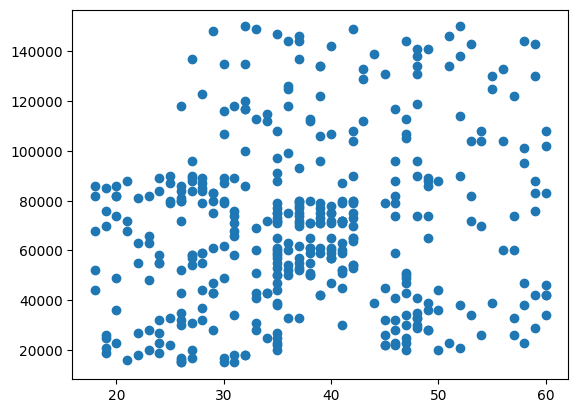

In [73]:
plt.scatter(df['Age'],df['EstimatedSalary'])

## Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), 
                                                   df['Purchased'],
                                                   random_state=0,
                                                   test_size=0.3)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [75]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train.sample(10)

,Age,EstimatedSalary
184,33,60000
302,37,137000
356,54,70000
70,25,80000
35,35,27000
320,52,138000
396,51,23000
112,38,61000
91,30,116000
360,43,129000


In [78]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [79]:
#numpy array ma dekhako lai, converting to pandas DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [80]:
# round off garda ra nagarda ko farak
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [81]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [82]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## For Scatter Plot Comparision

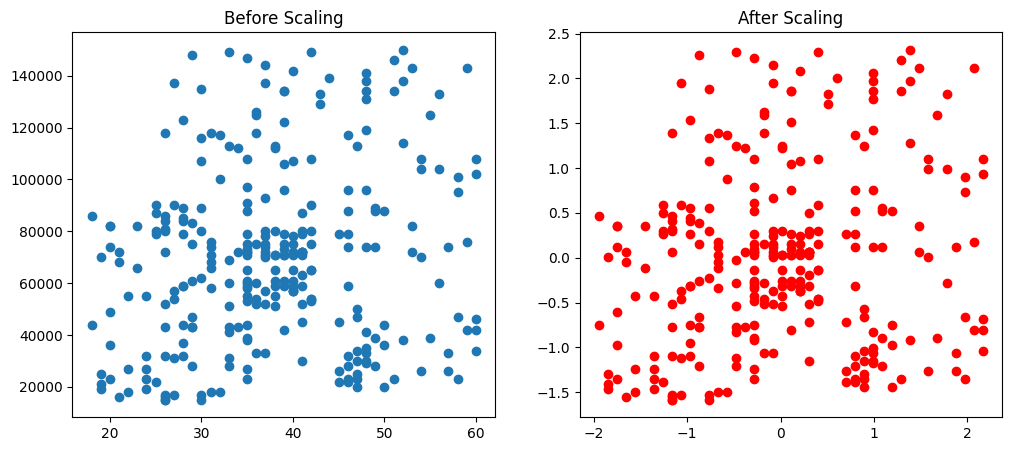

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize = (12,5))

#Before Scaling
ax1.set_title('Before Scaling')
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
plt.show()

## For KDE Plot Comparision

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

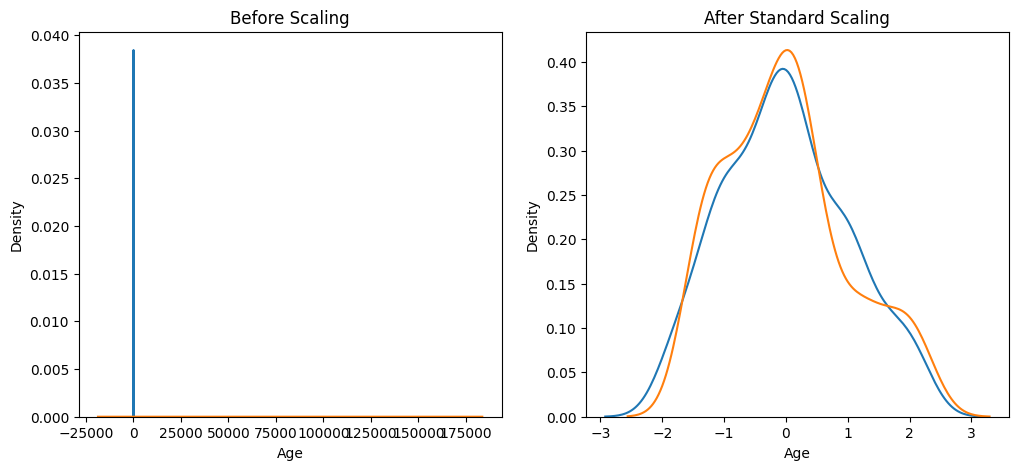

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

#After Scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, label='Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, label= 'EstimatedSalary')

## Comparison of Distributions

<Axes: xlabel='Age', ylabel='Density'>

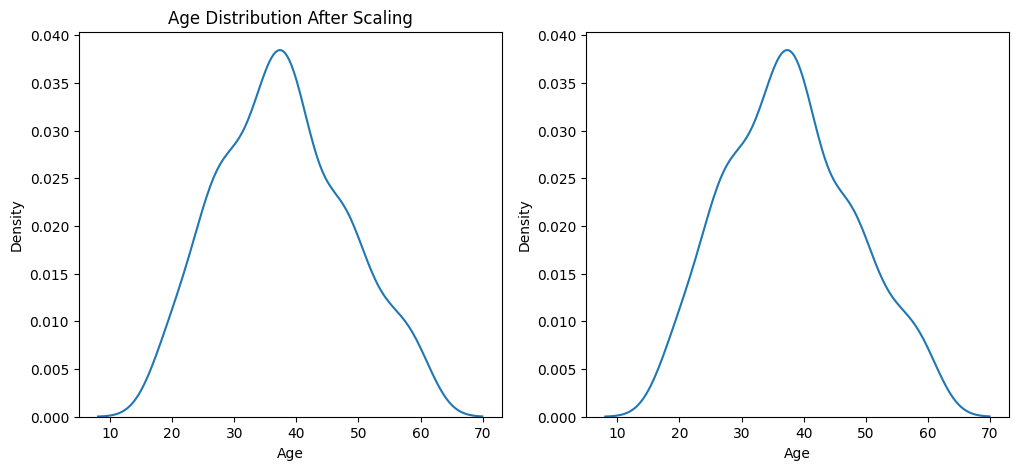

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize = (12,5))

#before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#After Scaling
ax1.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train['Age'], ax=ax2)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

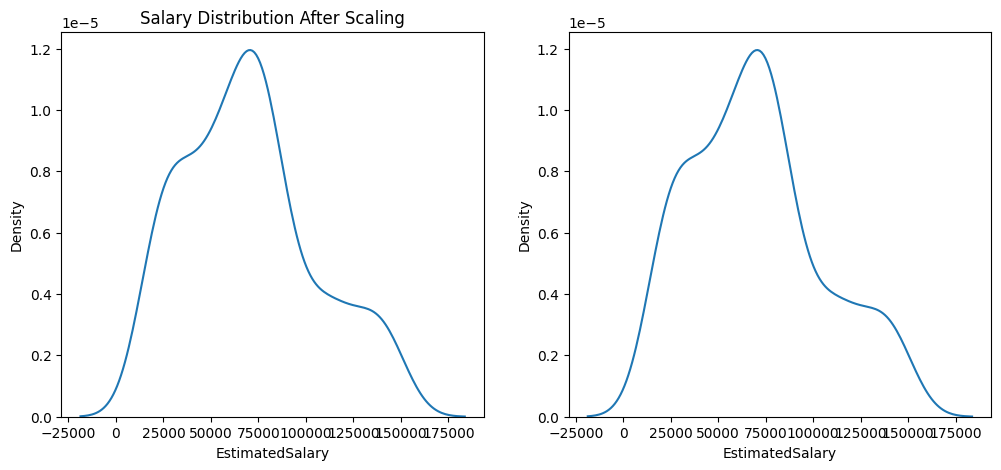

In [86]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize = (12,5))

#before Scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After Scaling
ax1.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax2)

## Why Scaling is important?

### For LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [89]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [90]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
print("Actual:", accuracy_score(y_test,y_pred))
print("Scaled:", accuracy_score(y_test,y_pred_scaled))

Actual: 0.875
Scaled: 0.8666666666666667


### For Decision Trees 

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [95]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [96]:
y_pred = dt.predict(X_test)
y_pred_scale = dt_scaled.predict(X_test_scaled)

In [97]:
print("Actual: ", accuracy_score(y_test, y_pred))
print("Scaled: ", accuracy_score(y_test, y_pred_scaled))

Actual:  0.875
Scaled:  0.8666666666666667


In [98]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outlier

In [99]:
new_rows = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 350000, 250000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_rows], ignore_index=True)
df.sample(5)

,Age,EstimatedSalary,Purchased
181,31,71000,0
294,35,57000,0
373,59,130000,1
370,60,46000,1
293,37,77000,0


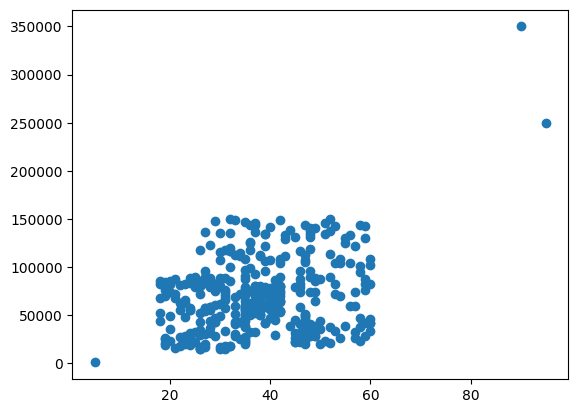

In [100]:
plt.scatter(df['Age'], df['EstimatedSalary'])